In [34]:
# Ignore Warnings.
import warnings
warnings.filterwarnings("ignore")

# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as st
import re
import os

In [35]:
# Import the data
Hurricane_df = pd.read_csv('new_data_atlantic.csv')
Hurricane_df

,Unnamed: 0,ID,Name,Date,Time,Status,Latitude,Longitude,Maximum Wind
0,0,AL011851,UNNAMED,1851-06-25,0,HU,28.0N,94.8W,80
1,1,AL011851,UNNAMED,1851-06-25,600,HU,28.0N,95.4W,80
2,2,AL011851,UNNAMED,1851-06-25,1200,HU,28.0N,96.0W,80
3,3,AL011851,UNNAMED,1851-06-25,1800,HU,28.1N,96.5W,80
4,4,AL011851,UNNAMED,1851-06-25,2100,HU,28.2N,96.8W,80
...,...,...,...,...,...,...,...,...,...
49100,49100,AL122015,KATE,2015-11-12,1200,EX,41.3N,50.4W,55
49101,49101,AL122015,KATE,2015-11-12,1800,EX,41.9N,49.9W,55
49102,49102,AL122015,KATE,2015-11-13,0,EX,41.5N,49.2W,50
49103,49103,AL122015,KATE,2015-11-13,600,EX,40.8N,47.5W,45


In [36]:
#new_data = Hurricane_df.groupby(['ID'])
new_data = Hurricane_df[['ID','Name','Date', 'Maximum Wind']]
new_data.head() 

,ID,Name,Date,Maximum Wind
0,AL011851,UNNAMED,1851-06-25,80
1,AL011851,UNNAMED,1851-06-25,80
2,AL011851,UNNAMED,1851-06-25,80
3,AL011851,UNNAMED,1851-06-25,80
4,AL011851,UNNAMED,1851-06-25,80


In [37]:
#need to find max for each ID
maxwnd_df=new_data
maxwnd_df

,ID,Name,Date,Maximum Wind
0,AL011851,UNNAMED,1851-06-25,80
1,AL011851,UNNAMED,1851-06-25,80
2,AL011851,UNNAMED,1851-06-25,80
3,AL011851,UNNAMED,1851-06-25,80
4,AL011851,UNNAMED,1851-06-25,80
...,...,...,...,...
49100,AL122015,KATE,2015-11-12,55
49101,AL122015,KATE,2015-11-12,55
49102,AL122015,KATE,2015-11-13,50
49103,AL122015,KATE,2015-11-13,45


In [38]:
maxwnd_df.describe()


,Maximum Wind
count,49105.000000
mean,52.005091
std,27.681902
min,-99.000000
25%,35.000000
50%,45.000000
75%,70.000000
max,165.000000


In [39]:
#Category 1: 74-95, Category 2: 96-110, category 3: 111-149 cat. 4: 130-156, cat.5 157-190 Category 0: 0-73

bins = [0, 74, 95, 110, 129, 156, 190]
# Create the names for the four bins
group_names = ["TS", "1", "2", "3", "4", "5"]
maxwnd_df['Category'] = pd.cut(maxwnd_df['Maximum Wind'], bins, labels=group_names)
maxwnd_df.head()


,ID,Name,Date,Maximum Wind,Category
0,AL011851,UNNAMED,1851-06-25,80,1
1,AL011851,UNNAMED,1851-06-25,80,1
2,AL011851,UNNAMED,1851-06-25,80,1
3,AL011851,UNNAMED,1851-06-25,80,1
4,AL011851,UNNAMED,1851-06-25,80,1


In [40]:
maxwnd_df.isnull().sum(axis = 0)

ID                0
Name              0
Date              0
Maximum Wind      0
Category        338
dtype: int64

In [41]:
maxwnd_df.isnull().values.any()

True

In [103]:
def StormCountByCategory(hurdata2):
    grouped = maxwnd_df.groupby('Category')['ID'].unique().to_frame().reset_index()
    grouped['Num'] = grouped['ID'].str.len()
    grouped.plot.bar(x='Category')
    plt.ylabel('Number of Storms')
    plt.xticks(rotation=0)
    plt.title('Storms from 1851-2015')

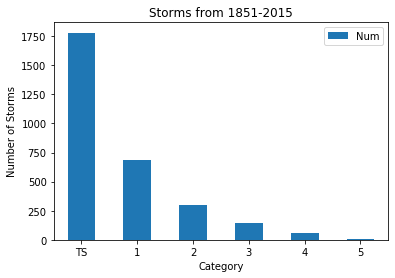

In [104]:
StormCountByCategory(maxwnd_df)

In [44]:
maxwnd_df['month'] = pd.DatetimeIndex(maxwnd_df['Date']).month
maxwnd_df.head()


,ID,Name,Date,Maximum Wind,Category,month
0,AL011851,UNNAMED,1851-06-25,80,1,6
1,AL011851,UNNAMED,1851-06-25,80,1,6
2,AL011851,UNNAMED,1851-06-25,80,1,6
3,AL011851,UNNAMED,1851-06-25,80,1,6
4,AL011851,UNNAMED,1851-06-25,80,1,6


In [45]:
exclude_TS = maxwnd_df.drop(maxwnd_df[maxwnd_df['Category'] == "TS"].index)


In [46]:
exclude_TS
exclude_TS["Category"].unique()

[1, 2, 3, 4, 5, NaN]
Categories (5, object): [1 < 2 < 3 < 4 < 5]

In [47]:
#Category 1: 74-95, Category 2: 96-110, category 3: 111-149 cat. 4: 130-156, cat.5 157-190 Category 0: 0-73
new_maxwnd_df = maxwnd_df.groupby(['month'])
hur_count = new_maxwnd_df['ID'].count()
hur_count

month
1       132
2        13
3        14
4        81
5       655
6      2349
7      3262
8     10857
9     18926
10     9802
11     2548
12      466
Name: ID, dtype: int64

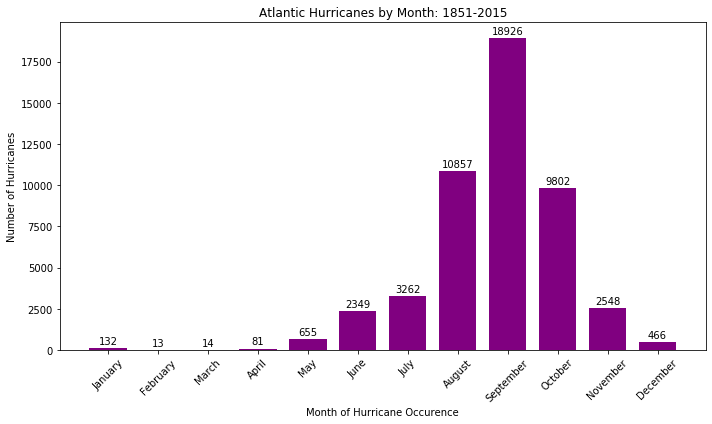

In [96]:
x = [u'January', u'February', u'March', u'April', u'May', u'June', u'July', u'August', u'September', u'October', u'November', u'December']
y = hur_count 


fig, ax = plt.subplots()    

fig.set_figheight(6)
fig.set_figwidth(10)

# the width of the bars 
width = 0.75 
# the x locations for the groups
ind = np.arange(len(x))  

rects1 = ax.bar(ind, y, width,label='hur_count',color= 'purple', align='center')
ax.set_xticks(ind)
ax.set_xticklabels(x, minor=False)
plt.xticks(rotation=45)
plt.title('Atlantic Hurricanes by Month: 1851-2015')
plt.xlabel('Month of Hurricane Occurence')
plt.ylabel('Number of Hurricanes')      

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,2 ),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
# use format='svg' or 'pdf' for vectorial pictures
fig.tight_layout()
plt.savefig(os.path.join('test.png'), dpi=300, format='png', bbox_inches='tight') 

plt.show()
